In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

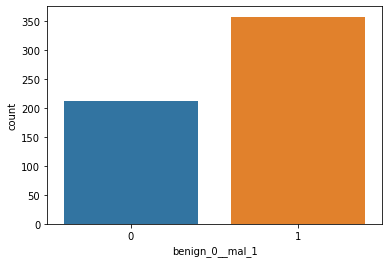

In [5]:
sns.countplot(x = 'benign_0__mal_1', data = df)

<AxesSubplot:>

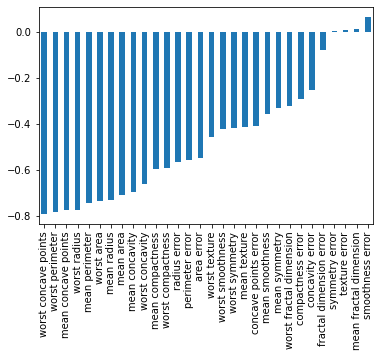

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

<AxesSubplot:>

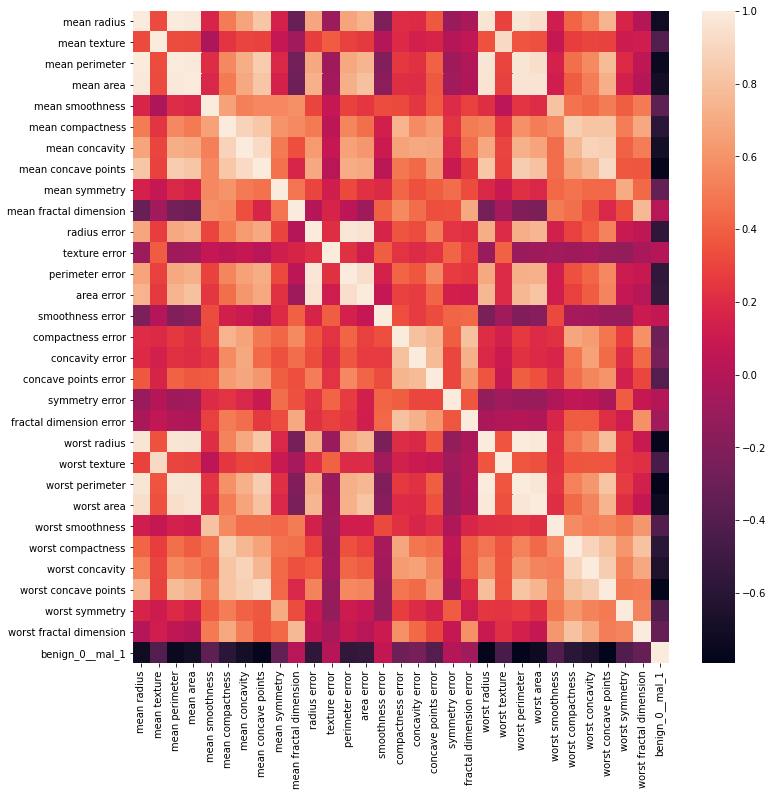

In [7]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

In [8]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Dense, Dropout

In [16]:
X_train.shape

(426, 30)

In [17]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))

# Binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [18]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 76ms/step - loss: 0.6790 - val_loss: 0.6680
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6572 - val_loss: 0.6437
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6325 - val_loss: 0.6156
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6043 - val_loss: 0.5839
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5736 - val_loss: 0.5438
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5392 - val_loss: 0.4978
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4958 - val_loss: 0.4538
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4577 - val_loss: 0.4050
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4129 - val_loss: 0.3611
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3607 - val_loss: 0.3203
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.2003
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0644 - val_loss: 0.2078
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0598 - val_loss: 0.1963
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0486 - val_loss: 0.2074
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0470 - val_loss: 0.2101
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0454 - val_loss: 0.2032
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0614 - val_loss: 0.2286
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0525 - val_loss: 0.2184
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0452 - val_loss: 0.1933
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0531 - val_loss: 0.2188


14/14 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.3033
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0346 - val_loss: 0.2862
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0294 - val_loss: 0.3044
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.2869
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.3275
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0359 - val_loss: 0.2942
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.2966
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0319 - val_loss: 0.3138
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0374 - val_loss: 0.3140
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0359 - val_loss: 0.2820
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.3747
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0333 - val_loss: 0.3819
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0324 - val_loss: 0.4080
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0204 - val_loss: 0.3966
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0236 - val_loss: 0.3732
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.4035
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0315 - val_loss: 0.3925
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.3886
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0311 - val_loss: 0.3606
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.4018
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0248 - val_loss: 0.4574
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.4577
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.4956
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.4458
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.4806
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0254 - val_loss: 0.4747
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0166 - val_loss: 0.4770
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0277 - val_loss: 0.4435
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0220 - val_loss: 0.5070
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.4570
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 0.5520
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.5358
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.5812
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0207 - val_loss: 0.5489
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0223 - val_loss: 0.5173
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.5786
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.5580
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.5300
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.5646
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.5620
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.6384
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.7120
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.6526
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.6851
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.6262
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.7497
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.6171
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.7587
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.5944
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.7029
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.7910
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.7747
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.7829
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.8019
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.8089
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.7817
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.8241
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.7989
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.7699
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.8347
Epoc

In [19]:
losses = pd.DataFrame(model.history.history)

In [20]:
losses

,loss,val_loss
0,0.675664,0.668045
1,0.649986,0.643748
2,0.625467,0.615553
3,0.599088,0.583873
4,0.567533,0.543838
...,...,...
595,0.006334,0.807091
596,0.006953,0.808704
597,0.006638,0.839830
598,0.006171,0.831097


<AxesSubplot:>

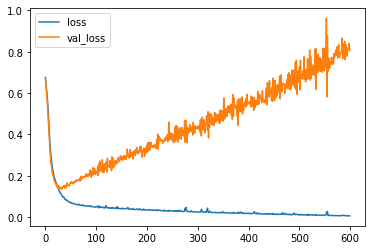

In [21]:
losses.plot()
# Overfitting

In [22]:
# Early stopping

model = Sequential()

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))

# Binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [25]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [26]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test),
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6948 - val_loss: 0.6854
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6774 - val_loss: 0.6658
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6640 - val_loss: 0.6466
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6358 - val_loss: 0.6223
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6167 - val_loss: 0.5926
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5858 - val_loss: 0.5557
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5407 - val_loss: 0.5097
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5015 - val_loss: 0.4606
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4586 - val_loss: 0.4102
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3942 - val_loss: 0.3613
Epoch 11

In [27]:
losses2 = pd.DataFrame(model.history.history)

<AxesSubplot:>

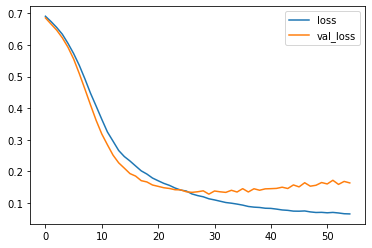

In [28]:
losses2.plot()

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5)) # Half of neurons in this layer are turned off

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

# Binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [31]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test),
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6989 - val_loss: 0.6714
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6994 - val_loss: 0.6544
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6934 - val_loss: 0.6383
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6349 - val_loss: 0.6176
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6050 - val_loss: 0.5848
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6054 - val_loss: 0.5482
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6081 - val_loss: 0.5252
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5303 - val_loss: 0.4922
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5212 - val_loss: 0.4593
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4975 - val_loss: 0.4334
Epoch 11

In [32]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

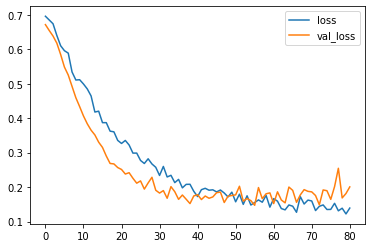

In [33]:
model_loss.plot()

In [46]:
predictions = model.predict_classes(X_test)

C:\Users\ahmhm\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        55
           1       0.99      0.86      0.92        88

    accuracy                           0.91       143
   macro avg       0.90      0.92      0.91       143
weighted avg       0.92      0.91      0.91       143



In [49]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [12 76]]
